In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# $z=\frac{x-\mu}{\sigma}$

### $z$: z score (표준점수)
### $\mu$: 모집단의 평균
### $\sigma$: 모집단의 표준편차

In [4]:
x = [0, 3, 5, 7, 10]

s = np.std(x)   # 표준편차
m = np.mean(x)  # 평균
z = (7 - m) / s # 숫자 7에 대한 z점수 계산

print(z)        # 평균까지의 거리를 표준편차로 나눈 값
"""
표준편차는 분산의 제곱근으로 데이터의 분포 정도를 나타낸다.
이를 점수화한 표준점수로 데이터 분포를 가늠할 수 있다.
"""

0.5872202195147035


In [5]:
stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [6]:
stats.norm.cdf(0)

np.float64(0.5)

In [7]:
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

np.float64(0.6826894921370859)

In [8]:
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0)

np.float64(0.9544997361036416)

In [9]:
stats.norm.ppf(0.9)

np.float64(1.2815515655446004)

In [10]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'data/ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /Users/woojinchoe/Desktop/study/Personal/Data_Scientist/hongong/chapter_07/data/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:02<00:00, 23.9MB/s]


'data/ns_book7.csv'

In [11]:
ns_book7 = pd.read_csv("data/ns_book7.csv", low_memory=False)

ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


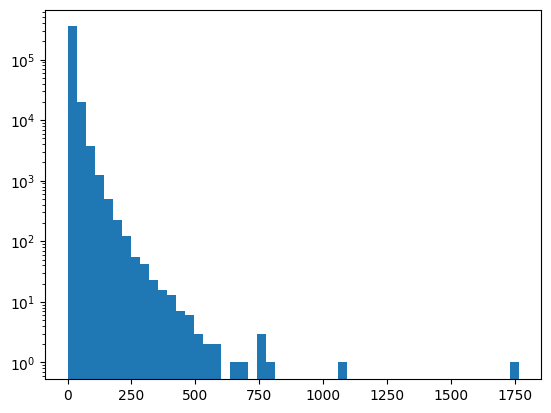

In [12]:
plt.hist(ns_book7['대출건수'], bins=50)
plt.yscale('log')
plt.show()

In [20]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(40).mean()
    sample_means.append(m)

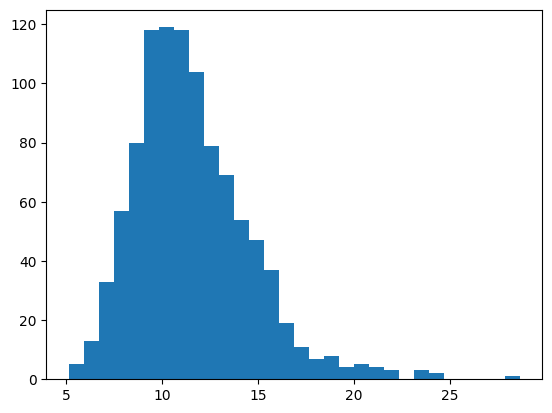

In [21]:
plt.hist(sample_means, bins=30)
plt.show()

In [22]:
np.mean(sample_means)

np.float64(11.5613)

In [23]:
ns_book7['대출건수'].mean()

np.float64(11.593438968070707)

In [24]:
np.std(sample_means)

np.float64(3.0355987564235165)

# $s=\frac{\sigma}{\sqrt{n}}$

### $s$: 표본 평균의 표준편차 (표준오차)
### $\sigma$: 모집단의 표준편차
### $n$: 표본에 포함된 샘플 갯수

In [25]:
np.std(ns_book7['대출건수']) / np.sqrt(40)

np.float64(3.048338251806833)

In [26]:
python_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('파이썬')
python_books = ns_book7[python_books_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [27]:
len(python_books)

251

In [28]:
python_mean = np.mean(python_books['대출건수'])
python_mean

np.float64(14.749003984063744)

## 모집단의 평균은 알 수 없고, 표본의 평균만 알 때는...

# $z=\frac{x-\mu}{s}=\frac{14.75-\mu}{\sigma/\sqrt{n}}$

# $\mu=14.75-z\frac{\sigma}{\sqrt{n}}$

In [29]:
python_std = np.std(python_books['대출건수'])
python_se = python_std / np.sqrt(len(python_books))
python_se

np.float64(0.8041612072427442)

In [30]:
stats.norm.cdf(0.975)

np.float64(0.8352198700196897)

In [31]:
stats.norm.ppf(0.025)

np.float64(-1.9599639845400545)

In [32]:
print(python_mean-1.96*python_se, python_mean+1.96*python_se)

13.172848017867965 16.325159950259522


In [33]:
cplus_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('C++', regex=False)
cplus_books = ns_book7[cplus_books_index]
cplus_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
101,103,C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 ...,존 도란.윌리엄 셰리프.스테판 화이틀 지음|조경빈,에이콘,2020,9791161754659,NaN,NaN,NaN,005.11,1,1,2021-03-15
19754,20779,Game Programming in C++,산자이 마드하브,에이콘출판,2019,9791161753560,NaN,NaN,NaN,005.133,1,10,2019-11-26
20198,21289,C++ API OpenCV 프로그래밍 - 2nd Edition,김동근,가메출판사,2016,9788980782864,NaN,NaN,NaN,004.77,1,5,2019-11-05
21630,22950,Visual C++ 영상처리 프로그래밍 =Visual C++ image proces...,황선규 지음,길벗,2015,9791186978153,NaN,9,NaN,004.77,1,3,2019-10-22
22461,23859,Functional Programming in C++,"이반 추키츠 지음, 김점갑 옮김",에이콘출판,2019,9791161753416,NaN,NaN,NaN,005.133,1,4,2019-09-26


In [34]:
len(cplus_books['도서권수'])

89

In [36]:
cplus_mean = np.mean(cplus_books['대출건수'])
cplus_mean

np.float64(11.595505617977528)

In [37]:
cplus_se = np.std(cplus_books['대출건수']) / np.sqrt(len(cplus_books))
cplus_se

np.float64(0.9748405650607009)

In [40]:
(python_mean - cplus_mean) / np.sqrt(python_se**2 + cplus_se**2)

np.float64(2.495408195140708)

In [41]:
stats.norm.cdf(2.50)

np.float64(0.9937903346742238)

In [43]:
t, pvalue = stats.ttest_ind(python_books['대출건수'], cplus_books['대출건수'])
print(t, pvalue)

2.1390005694958574 0.033151795202247834


In [46]:
stats.norm.cdf(2.1390005694958574)

np.float64(0.9837821888749227)

---

In [47]:
def statistic(x, y):
    return np.mean(x) - np.mean(y)

In [52]:
def permutation_test(x, y):
    obs_diff = statistic(x, y)
    all = np.append(x, y)
    diffs = []
    np.random.seed(42)
    for _ in range(1000):
        idx = np.random.permutation(len(all))
        x_ = all[idx[:len(x)]]
        y_ = all[idx[len(x):]]
        diffs.append(statistic(x_, y_))

    less_pvalue = np.sum(diffs < obs_diff)/1000
    greater_pvalue = np.sum(diffs > obs_diff)/1000

    return obs_diff, np.minimum(less_pvalue, greater_pvalue) * 2

In [53]:
permutation_test(python_books['대출건수'], cplus_books['대출건수'])

(np.float64(3.1534983660862164), np.float64(0.022))

In [54]:
res = stats.permutation_test((python_books['대출건수'], cplus_books['대출건수']), statistic, random_state=42)

print(res.statistic, res.pvalue)

3.1534983660862164 0.0258


In [56]:
java_books_idx = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('자바스크립트')
java_books = ns_book7[java_books_idx]
java_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1030,1049,자바스크립트로 하는 자료 구조와 알고리즘 (핵심 자료 구조 및 알고리즘을 이해하고 ...,<b>배세민</b>,에이콘,2019,9791161753447,NaN,NaN,NaN,005.138,1,1,2021-03-09
2521,2627,프레임워크 없는 프론트엔드 개발 (자바스크립트 프레임워크 뜯어보기),프란세스코 스트라츨로,에이콘출판,2021,9791161754895,NaN,NaN,NaN,005.138,1,1,2021-02-08
4989,5330,(ES6로 기초부터 다시 배우는) 자바스크립트 파워북,어포스트 지음,어포스트,2020,9791197122811,NaN,9,NaN,005.133,1,4,2020-10-19
4997,5338,모던 자바스크립트 deep dive :자바스크립트의 기본 개념과 동작 원리,이웅모 지음,위키북스,2020,9791158392239,NaN,9,NaN,005.138,1,4,2020-10-19
14028,14759,(자바스크립트와 함께하는) 블록체인 코딩 :JavaScript와node.js로 분산...,"Eric Traub 지음 ;금창섭,안휘,이재준 옮김",홍릉과학출판사,2020,9791156007043,NaN,9,NaN,005.1,1,4,2020-04-20


In [57]:
print(len(java_books), np.mean(java_books['대출건수']))

105 15.533333333333333


In [58]:
permutation_test(python_books['대출건수'], java_books['대출건수'])

(np.float64(-0.7843293492695889), np.float64(0.566))